In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape


(60000, 28, 28)

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

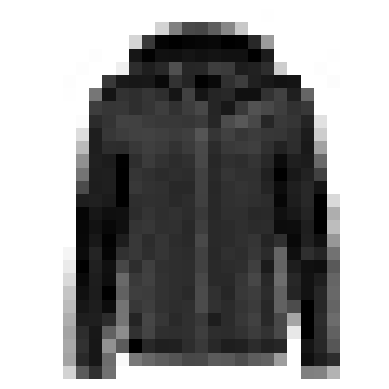

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Saving figure fashion_mnist_plot


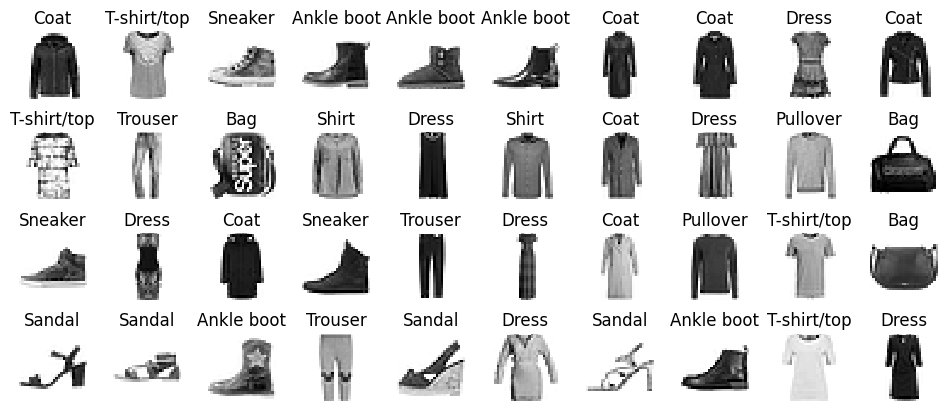

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
#passing list of layers instead of one by one

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.layers


In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7179 - accuracy: 0.7628 - val_loss: 0.5180 - val_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4890 - accuracy: 0.8270 - val_loss: 0.4386 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4431 - accuracy: 0.8436 - val_loss: 0.5173 - val_accuracy: 0.8050
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4166 - accuracy: 0.8543 - val_loss: 0.3968 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3981 - accuracy: 0.8605 - val_loss: 0.3776 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3795 - accuracy: 0.8663 - val_loss: 0.3743 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3668 - accuracy: 0.8706 - val_loss: 0.3666 - val_accuracy:

Saving figure keras_learning_curves_plot


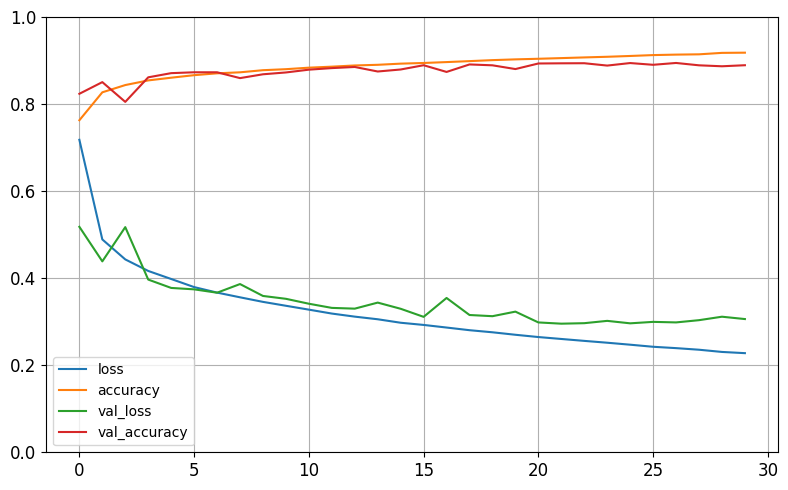

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8791


[0.3437637984752655, 0.8791000247001648]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 150ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 28ms/step


array([9, 2, 1], dtype=int64)

In [25]:

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


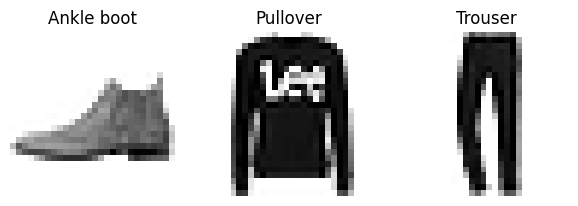

In [29]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.2023 - val_loss: 1.4318
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8161 - val_loss: 0.7634
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7112 - val_loss: 0.6479
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6521 - val_loss: 0.6029
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6125 - val_loss: 0.5619
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5814 - val_loss: 0.5379
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5581 - val_loss: 0.5161
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5387 - val_loss: 0.4976
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5223 - val_loss: 0.4828
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5084 - val_loss: 0.4699

In [33]:
np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [34]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8787 - val_loss: 1.1045
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7243 - val_loss: 0.9375
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6762 - val_loss: 0.6723
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6330 - val_loss: 0.5925
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6051 - val_loss: 0.6511
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5802 - val_loss: 0.5854
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5619 - val_loss: 0.5240
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5449 - val_loss: 0.5920
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5297 - val_loss: 0.5054
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5175 - val_loss: 0.4860

In [35]:

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [38]:

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 4.2353 - main_output_loss: 1.8587 - aux_output_loss: 2.3766 - val_loss: 2.0798 - val_main_output_loss: 0.7999 - val_aux_output_loss: 1.2799
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8282 - main_output_loss: 0.6747 - aux_output_loss: 1.1535 - val_loss: 1.7407 - val_main_output_loss: 0.6057 - val_aux_output_loss: 1.1351
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6099 - main_output_loss: 0.5947 - aux_output_loss: 1.0152 - val_loss: 1.5608 - val_main_output_loss: 0.5346 - val_aux_output_loss: 1.0263
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4488 - main_output_loss: 0.5478 - aux_output_loss: 0.9010 - val_loss: 1.3615 - val_main_output_loss: 0.4957 - val_aux_output_loss: 0.8658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3135 - main_output_loss: 0.5106 - aux_output_loss: 0.8029 - val_loss

In [36]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [39]:

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9398 - main_output_loss: 0.3981 - aux_output_loss: 0.5416 - val_loss: 0.9372 - val_main_output_loss: 0.3713 - val_aux_output_loss: 0.5659
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9339 - main_output_loss: 0.3964 - aux_output_loss: 0.5375 - val_loss: 1.0123 - val_main_output_loss: 0.3840 - val_aux_output_loss: 0.6283
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9300 - main_output_loss: 0.3955 - aux_output_loss: 0.5345 - val_loss: 0.9692 - val_main_output_loss: 0.3786 - val_aux_output_loss: 0.5907
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9260 - main_output_loss: 0.3936 - aux_output_loss: 0.5323 - val_loss: 0.9694 - val_main_output_loss: 0.3856 - val_aux_output_loss: 0.5838
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9222 - main_output_loss: 0.3933 - aux_output_loss: 0.5289 - val_loss

In [40]:

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 21ms/step


In [41]:

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [42]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 2.6479 - output_1_loss: 2.4446 - output_2_loss: 4.4769 - val_loss: 1.5953 - val_output_1_loss: 1.3774 - val_output_2_loss: 3.5572
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0936 - output_1_loss: 0.8638 - output_2_loss: 3.1622 - val_loss: 1.0312 - val_output_1_loss: 0.8456 - val_output_2_loss: 2.7011
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8652 - output_1_loss: 0.6887 - output_2_loss: 2.4536 - val_loss: 0.8117 - val_output_1_loss: 0.6577 - val_output_2_loss: 2.1977
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7541 - output_1_loss: 0.6132 - output_2_loss: 2.0221 - val_loss: 0.7170 - val_output_1_loss: 0.5879 - val_output_2_loss: 1.8795
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6872 - output_1_loss: 0.5698 - output_2_loss: 1.7446 - val_loss: 0.6413 - val_output_1_loss: 0.5271 - val_ou

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [45]:

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.2875 - val_loss: 1.2052
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7867 - val_loss: 0.7002
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6611 - val_loss: 0.6091
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6048 - val_loss: 0.5612
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5634 - val_loss: 0.5238
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5296 - val_loss: 0.4943
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5031 - val_loss: 0.4646
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4822 - val_loss: 0.4565
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4656 - val_loss: 0.4405
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4415


In [46]:

model.save("my_keras_model.h5")

In [47]:
model = keras.models.load_model("my_keras_model.h5")

In [48]:
model.predict(X_new)

1/1 [==============================] - 0s 79ms/step


array([[0.7527417],
       [1.4020455],
       [3.3375578]], dtype=float32)

In [49]:
model.save_weights("my_keras_weights.ckpt")

In [50]:
model.load_weights("my_keras_weights.ckpt")


In [51]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [53]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.6220 - val_loss: 0.8337
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7546 - val_loss: 0.8023
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6736 - val_loss: 0.6687
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6185 - val_loss: 0.5688
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5745 - val_loss: 0.5299
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5375 - val_loss: 0.4936
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5081 - val_loss: 0.4677
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4848 - val_loss: 0.4665
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4657 - val_loss: 0.4368
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4416


callbacks

In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.5172 - val_loss: 0.7140
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6821 - val_loss: 0.6212
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6287 - val_loss: 0.5789
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5851 - val_loss: 0.5332
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5477 - val_loss: 0.4993
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5164 - val_loss: 0.4747
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4916 - val_loss: 0.4524
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4716 - val_loss: 0.4450
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4555 - val_loss: 0.4372
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4253


In [55]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4326 - val_loss: 0.4319
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4245 - val_loss: 0.4420
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4179 - val_loss: 0.4429
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4120 - val_loss: 0.4539
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4080 - val_loss: 0.4445
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4037 - val_loss: 0.4646
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4009 - val_loss: 0.4512
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3979 - val_loss: 0.4431
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3952 - val_loss: 0.4526
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3930 - val_lo

In [56]:

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [57]:

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

353/363 [============================>.] - ETA: 0s - loss: 0.4221
val/train: 1.02
363/363 [==============================] - 1s 2ms/step - loss: 0.4244 - val_loss: 0.4331


tensorboard

In [58]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [59]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_11_21-15_11_37'

In [60]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [61]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [62]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 3s 7ms/step - loss: 2.1761 - val_loss: 1.3949
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.8083 - val_loss: 0.6851
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6228 - val_loss: 0.6459
Epoch 4/30
363/363 [==============================] - 2s 6ms/step - loss: 0.5687 - val_loss: 0.5542
Epoch 5/30
363/363 [==============================] - 2s 6ms/step - loss: 0.5344 - val_loss: 0.5084
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5065 - val_loss: 0.4801
Epoch 7/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4844 - val_loss: 0.4594
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4660 - val_loss: 0.4389
Epoch 9/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4505 - val_loss: 0.4260
Epoch 10/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4378 - val_loss: 0.4141

In [63]:

%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [64]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_11_21-15_27_59'

fine tuning hyperparameters

In [ ]:
#exercises


